<a href="https://colab.research.google.com/github/petercloud23/Equipe_DataScience_SENAI_Out25/blob/main/dataScience2_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''Iremos explorar agora um “kit” de códigos em Python + matplotlib para gerar gráficos a partir das notas dos alunos. '''

#1) Dados e DataFrame (base comum):

import pandas as pd
import matplotlib.pyplot as plt

# --- Dados de exemplo ---
alunos = ["Ana", "João", "Maria"]
notas = [
    [7.5, 8.0, 9.0],  # Ana
    [6.0, 5.5, 7.0],  # João
    [9.0, 8.5, 10.0]  # Maria
]

# Monta lista de dicts com nome, notas e média
dados = []
for nome, n in zip(alunos, notas): # Veja explicação abaixo
    dados.append({"nome": nome, "notas": n, "media": sum(n)/len(n)})

df = pd.DataFrame(dados)
print(df)

'''*O código itera pelas listas alunos e notas simultaneamente usando a função zip(). Em cada iteração:

nome receberá o valor do elemento atual da lista alunos (por exemplo, "Ana", "João", "Maria").
n receberá o valor do elemento atual da lista notas (por exemplo, [7.5, 8.0, 9.0], [6.0, 5.5, 7.0], [9.0, 8.5, 10.0]).
Isso permite que você processe o nome de cada aluno e sua lista de notas correspondente dentro do loop.'''

    nome             notas     media
0    Ana   [7.5, 8.0, 9.0]  8.166667
1   João   [6.0, 5.5, 7.0]  6.166667
2  Maria  [9.0, 8.5, 10.0]  9.166667


'*O código itera pelas listas alunos e notas simultaneamente usando a função zip(). Em cada iteração:\n\nnome receberá o valor do elemento atual da lista alunos (por exemplo, "Ana", "João", "Maria").\nn receberá o valor do elemento atual da lista notas (por exemplo, [7.5, 8.0, 9.0], [6.0, 5.5, 7.0], [9.0, 8.5, 10.0]).\nIsso permite que você processe o nome de cada aluno e sua lista de notas correspondente dentro do loop.'

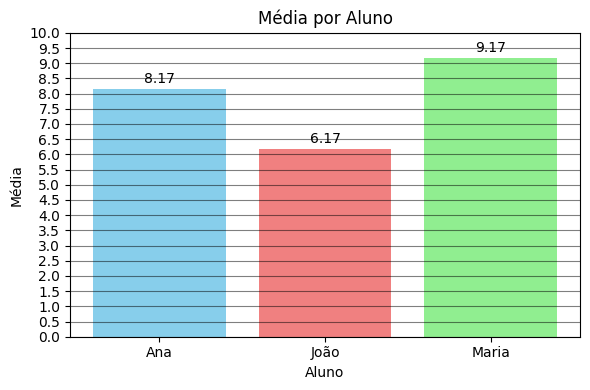

In [22]:
import numpy as np

#2) Gráfico de barras da média por aluno

plt.figure(figsize=(6, 4)) #cria uma nova figura para o gráfico com um tamanho especificado. O 6 representa a largura e 4, representa a altura em polegadas.
bars = plt.bar(df["nome"], df["media"], color=['skyblue', 'lightcoral', 'lightgreen']) #gera o gráfico de barras. Ele usa os nomes dos alunos da coluna "nome" do DataFrame para o eixo x e as notas médias da coluna "media" para o eixo y.
plt.title("Média por Aluno") #define o título do gráfico como "Média por Aluno".
plt.xlabel("Aluno") #plt.xlabel("Aluno") e plt.ylabel("Média") definem os rótulos para os eixos x e y, respectivamente.
plt.ylabel("Média")
plt.yticks(np.arange(0,10.5,0.5))
plt.grid(axis="y", linestyle="-", alpha=0.5 , color = 'black' ) #adiciona uma grade horizontal ao gráfico para melhor legibilidade.

# Adicionar rótulos nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha= 'center', va='bottom') # Ajuste o valor 0.1 para controlar o espaçamento do rótulo

plt.tight_layout() #ajusta o gráfico para evitar sobreposição de rótulos.
plt.show() #exibe o gráfico gerado.
# Para salvar: plt.savefig("medias_alunos.png", dpi=150)

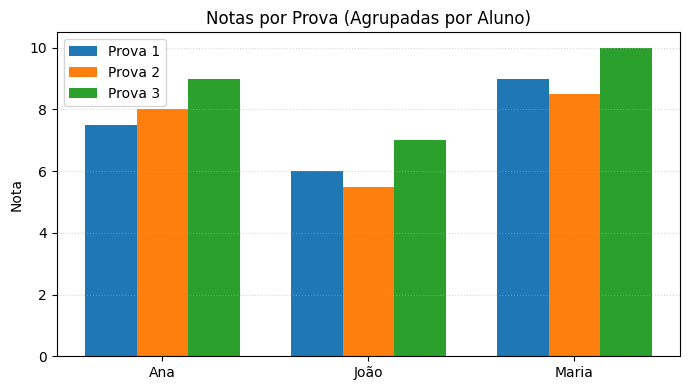

In [25]:
#3) Gráfico agrupado: nota de cada prova por aluno. Primeiro, transformamos as notas em colunas “Prova 1/2/3” para plotar lado a lado.


# Expande a lista 'notas' em colunas
df_exp = pd.DataFrame({ #cria um novo DataFrame panda chamado df_exp, com colunas "nome", "Prova 1", "Prova 2", e "Prova 3".
    "nome": alunos,
    "Prova 1": [n[0] for n in notas], #extrai as notas da primeira, segunda e terceira prova da lista de notas, de cada aluno, e coloca em listas separadas por prova.
    "Prova 2": [n[1] for n in notas],
    "Prova 3": [n[2] for n in notas],
})

# Plot agrupado
plt.figure(figsize=(7, 4)) #cria uma nova figura para o gráfico com o tamanho especificado em polegadas.
largura = 0.25 #define a largura de cada barra no gráfico agrupado.
x = range(len(df_exp))  #cria uma sequência de números representando as posições de base de cada aluno no eixo x (posições base: um por aluno)

plt.bar([p - largura for p in x], df_exp["Prova 1"], width=largura, label="Prova 1")
plt.bar(x,                        df_exp["Prova 2"], width=largura, label="Prova 2")
plt.bar([p + largura for p in x], df_exp["Prova 3"], width=largura, label="Prova 3")
'''#As três chamadas plt.bar() criam as barras para Prova 1, Prova 2 e Prova 3.
#Elas são deslocadas usando p - largura e p + largura para agrupar as barras para cada aluno.
p é uma variável temporária que representa cada elemento individual da sequência x durante a iteração da list comprehension [p - largura for p in x].
*Veja mais abaixo a explicação da list comprehension.'''

plt.xticks(list(x), df_exp["nome"]) #define os rótulos do eixo x para os nomes dos alunos.
plt.ylabel("Nota") #define o rótulo para o eixo y.
plt.title("Notas por Prova (Agrupadas por Aluno)") #define o título da tabela.
plt.legend() #displays a legend to identify which bar corresponds to which test.
plt.grid(axis="y", linestyle=":", alpha=0.5) #adiciona linhas de grade horizontais ('y') pontilhadas (:) e semi-transparentes (0.5 = 50%) ao seu gráfico, o que pode ajudar na leitura dos valores no eixo y.
plt.tight_layout() #ajusta o gráfico para evitar elementos sobrepostos.
plt.show()


In [23]:
print(df_exp)

NameError: name 'df_exp' is not defined

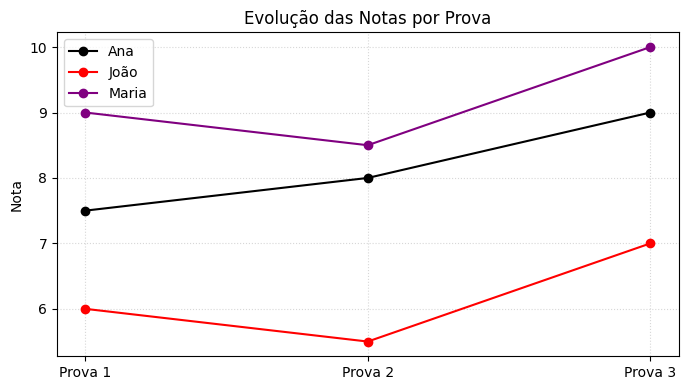

In [26]:
#4) Gráfico de linhas: evolução das provas por aluno
plt.figure(figsize=(7, 4))

provas = ["Prova 1", "Prova 2", "Prova 3"]
x = range(1, 4)

colors =  ['black', 'red', 'purple']# Define a list of colors

for i, (nome, n) in enumerate(zip(alunos, notas)): # Use enumerate to get the index
    plt.plot(x, n, marker="o", label=nome, color=colors[i]) # Assign color based on index

plt.xticks(x, provas)
plt.ylabel("Nota")
plt.title("Evolução das Notas por Prova")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2835947537.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_exp["Prova 1"], df_exp["Prova 2"], df_exp["Prova 3"]],


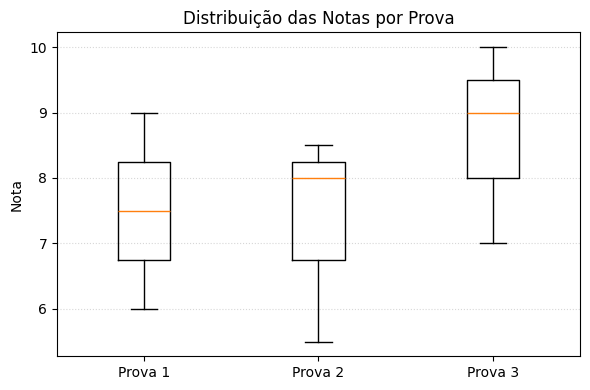

In [27]:
#5) Boxplot: distribuição das notas por prova

plt.figure(figsize=(6, 4))
plt.boxplot([df_exp["Prova 1"], df_exp["Prova 2"], df_exp["Prova 3"]],
            labels=["Prova 1", "Prova 2", "Prova 3"])
plt.ylabel("Nota")
plt.title("Distribuição das Notas por Prova")
plt.grid(axis="y", linestyle=":", alpha=0.5)
plt.tight_layout()
plt.show()


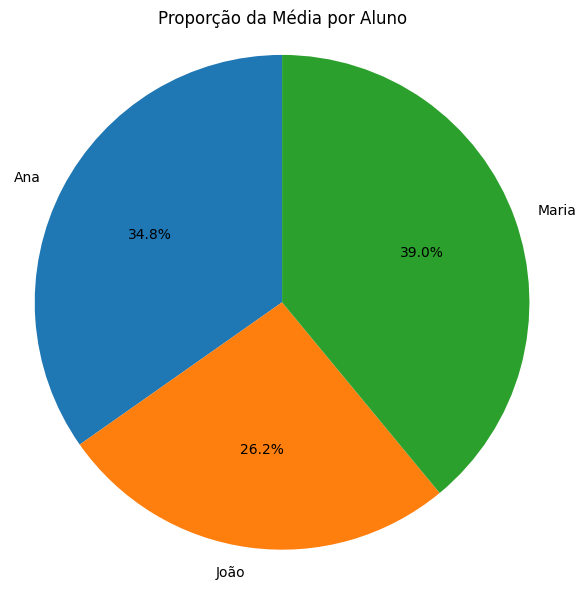

In [28]:
# 6) Gráfico de pizza da média por aluno

plt.figure(figsize=(6, 6))

# Calculate the sum of all averages for normalization
total_media = df["media"].sum()

# Calculate the proportion of each student's average
proportions = df["media"] / total_media

# Create the pie chart
plt.pie(proportions, labels=df["nome"], autopct='%1.1f%%', startangle=90) # autopct exibe a porcentagem nas fatias, startangle gira o início do gráfico de pizza
plt.title("Proporção da Média por Aluno")
plt.axis('equal')  # A proporção igual garante que a pizza seja desenhada como um círculo.
plt.tight_layout() # ajusta o gráfico para evitar sobreposição de elementos.
plt.show()